In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser

%matplotlib inline
sns.set(color_codes=True)

# === 2. Load raw dataset ===
df_raw = pd.read_csv(r"C:\Users\Thomas Wai\OneDrive - AGSE\Desktop\Python\Uber\UberDataset.csv")

In [2]:
# Count and data types for all columns
df_raw .info()

# Statistical summary for numerical columns
df_raw .describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
count,1156,1155,1155,1155,1155,1156.000000,653
unique,1155,1154,2,177,188,NaN,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Meeting
freq,2,2,1078,201,203,NaN,187
mean,NaN,NaN,NaN,NaN,NaN,21.115398,NaN
std,NaN,NaN,NaN,NaN,NaN,359.299007,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


In [3]:
df_raw .isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [4]:
# Investigate trips with more than 500 miles
df_raw[df_raw['MILES'] > 500].sort_values('MILES', ascending=False)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
# Remove the row where START_DATE is 'Totals'
df_raw = df_raw[df_raw['START_DATE'] != 'Totals']

In [6]:
#4. Define a safe parser using dateutil === (becuase pandas does work for some of the date data as they are in different format)
def safe_parse_date(x):
    try:
        return parser.parse(str(x))
    except Exception:
        return pd.NaT

In [7]:
# Parse dates using safe method
df = df_raw.copy()
df['START_DATE'] = df_raw['START_DATE'].apply(safe_parse_date)
df['END_DATE']   = df_raw['END_DATE'].apply(safe_parse_date)

In [8]:
# Confirm parsing worked
print("START_DATE unparsed:", df['START_DATE'].isna().sum())
print("END_DATE unparsed:", df['END_DATE'].isna().sum())

START_DATE unparsed: 0
END_DATE unparsed: 0


In [9]:
# Create trip duration feature
df['MILES'] = df['MILES'].astype(float)  # ensure numeric
df['DURATION_OF_THE_RIDE'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

In [10]:
# Replace corrupted characters in START and STOP columns
df['START'] = df['START'].replace({'Kar?chi': 'Karachi', 'R?walpindi': 'Rawalpindi'})
df['STOP'] = df['STOP'].replace({'Kar?chi': 'Karachi', 'R?walpindi': 'Rawalpindi'})

In [11]:
# Time of Day (hour-based)
df['TIME_OF_DAY_HOUR'] = df['START_DATE'].dt.hour
df['TIME_OF_DAY'] = pd.cut(
    x=df['TIME_OF_DAY_HOUR'],
    bins=[0, 6, 11, 17, 21, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'],
    ordered=False
)

# Month of the Ride
df['MONTH_OF_THE_RIDE'] = df['START_DATE'].dt.month
month_label = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].map(month_label)

# Day of the Week
df['DAY_OF_THE_RIDE'] = df['START_DATE'].dt.weekday
day_label = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu',
    4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df['DAY_OF_THE_RIDE'] = df['DAY_OF_THE_RIDE'].map(day_label)

In [12]:
# Final Check
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   START_DATE            1155 non-null   datetime64[ns]
 1   END_DATE              1155 non-null   datetime64[ns]
 2   CATEGORY              1155 non-null   object        
 3   START                 1155 non-null   object        
 4   STOP                  1155 non-null   object        
 5   MILES                 1155 non-null   float64       
 6   PURPOSE               653 non-null    object        
 7   DURATION_OF_THE_RIDE  1155 non-null   float64       
 8   TIME_OF_DAY_HOUR      1155 non-null   int32         
 9   TIME_OF_DAY           1136 non-null   category      
 10  MONTH_OF_THE_RIDE     1155 non-null   object        
 11  DAY_OF_THE_RIDE       1155 non-null   object        
dtypes: category(1), datetime64[ns](2), float64(2), int32(1), object(6)
memory usage: 

In [13]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION_OF_THE_RIDE,TIME_OF_DAY_HOUR,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,21,Evening,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,1,Night,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,20,Evening,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,17,Afternoon,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,14,Afternoon,Jan,Wed


In [14]:
# summary statistics of the dataset
df.describe()

,START_DATE,END_DATE,MILES,DURATION_OF_THE_RIDE,TIME_OF_DAY_HOUR
count,1155,1155,1155.000000,1155.000000,1155.000000
mean,2016-07-16 23:44:33.402597376,2016-07-17 00:07:47.999999744,10.566840,23.243290,14.696104
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.000000,0.000000
25%,2016-04-01 02:10:00,2016-04-01 02:35:00,2.900000,10.000000,12.000000
50%,2016-07-21 17:17:00,2016-07-21 17:23:00,6.000000,16.000000,15.000000
75%,2016-10-27 21:06:30,2016-10-27 21:21:00,10.400000,27.500000,18.000000
max,2016-12-31 22:08:00,2016-12-31 23:51:00,310.300000,336.000000,23.000000
std,NaN,NaN,21.579106,27.318277,4.575226


In [15]:
# Confirm the time period
print('Min Timestamp in START_TIME is - {}'.format(df['START_DATE'].min()))
print('Max Timestamp in START_TIME is - {}'.format(df['START_DATE'].max()))

Min Timestamp in START_TIME is - 2016-01-01 21:11:00
Max Timestamp in START_TIME is - 2016-12-31 22:08:00


In [16]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].nunique()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].nunique()))
print("Total number of unique location in START - {}".format(df['START'].nunique()))
print("Total number of unique location in STOP - {}".format(df['STOP'].nunique()))

Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 10
Total number of unique location in START - 175
Total number of unique location in STOP - 186


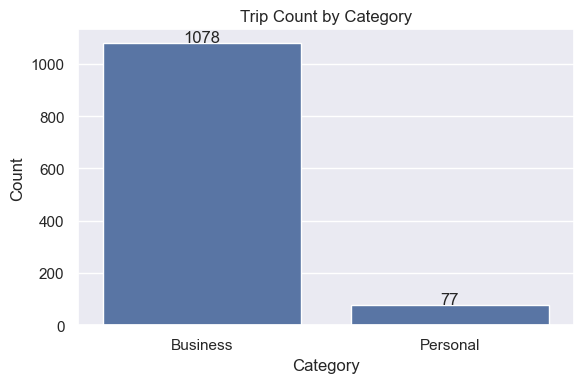

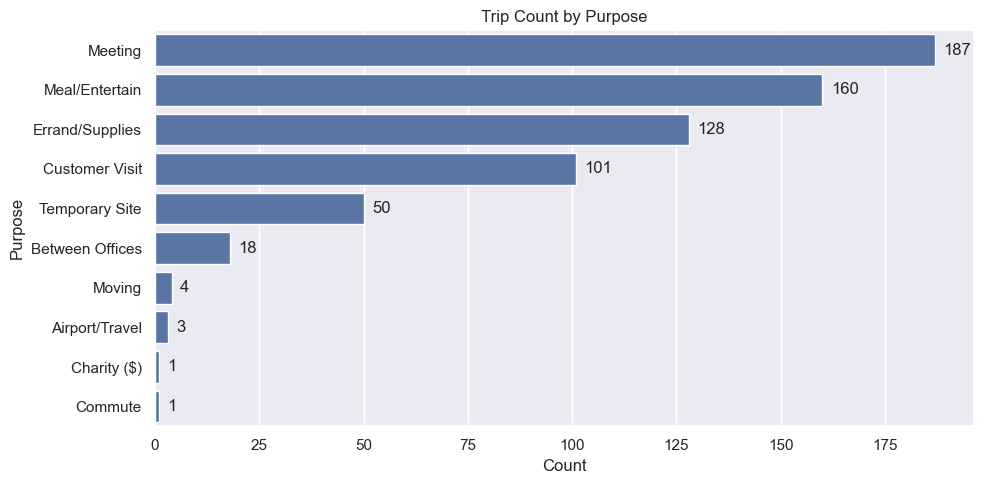

In [17]:
# Trip Count by Category
plt.figure(figsize=(6, 4))
category_order = df['CATEGORY'].value_counts()
ax1 = sns.countplot(data=df, x='CATEGORY', order=category_order.index)
plt.title('Trip Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Add labels on top of bars
for i, count in enumerate(category_order.values):
    ax1.text(i, count + 5, str(count), ha='center')

plt.tight_layout()
plt.show()

# === Trip Count by Purpose ===
plt.figure(figsize=(10, 5))
purpose_order = df['PURPOSE'].value_counts()
ax2 = sns.countplot(data=df, y='PURPOSE', order=purpose_order.index)
plt.title('Trip Count by Purpose')
plt.xlabel('Count')
plt.ylabel('Purpose')

# Add labels next to bars
for i, count in enumerate(purpose_order.values):
    ax2.text(count + 2, i, str(count), va='center')

plt.tight_layout()
plt.show()

#Insight
#Business trips dominate the dataset (1,078 out of 1,155).
#Meetings, Meal/Entertainment, and Errand/Supplies are the top 3 purposes.

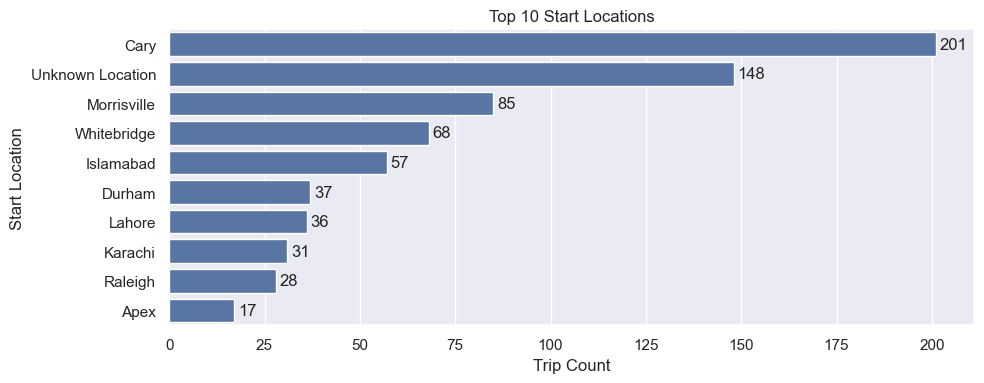

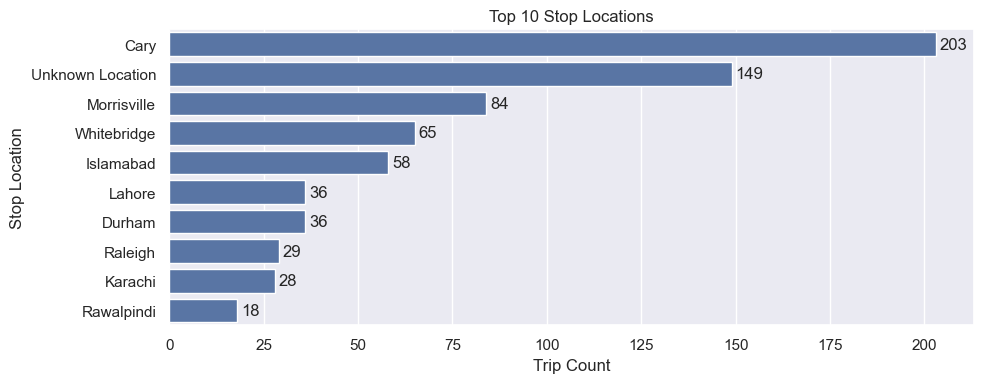

In [18]:
# Top 10 START Locations
plt.figure(figsize=(10, 4))
start_order = df['START'].value_counts().head(10)
ax1 = sns.countplot(data=df, y='START', order=start_order.index)
plt.title('Top 10 Start Locations')
plt.xlabel('Trip Count')
plt.ylabel('Start Location')

# Add counts on bars
for i, count in enumerate(start_order.values):
    ax1.text(count + 1, i, str(count), va='center')

plt.tight_layout()
plt.show()

# Top 10 STOP Locations
plt.figure(figsize=(10, 4))
stop_order = df['STOP'].value_counts().head(10)
ax2 = sns.countplot(data=df, y='STOP', order=stop_order.index)
plt.title('Top 10 Stop Locations')
plt.xlabel('Trip Count')
plt.ylabel('Stop Location')

# Add counts on bars
for i, count in enumerate(stop_order.values):
    ax2.text(count + 1, i, str(count), va='center')

plt.tight_layout()
plt.show()

#Cary is the top start and stop location.
#There is a significant number of trips from/to “Unknown Location”.

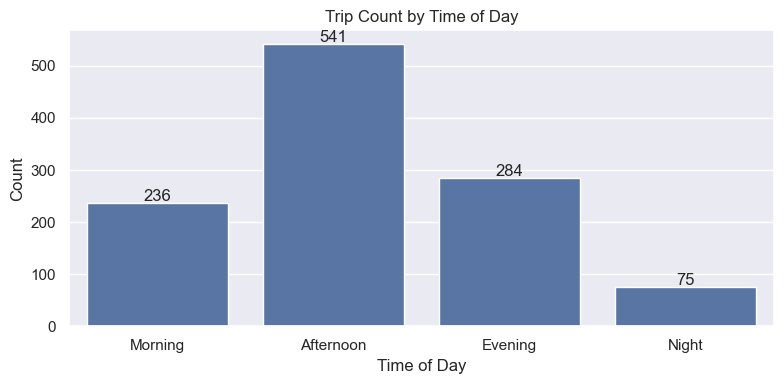

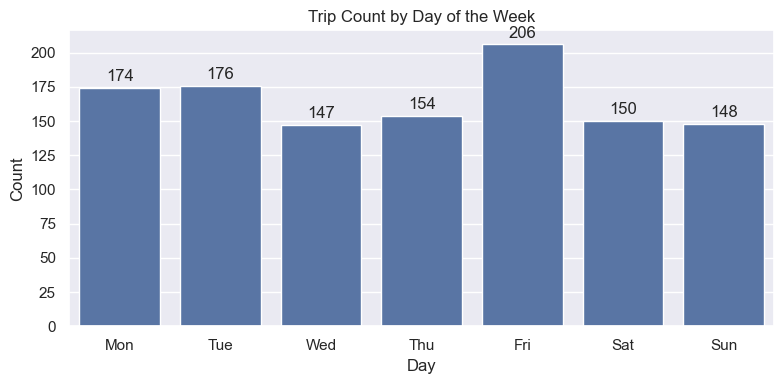

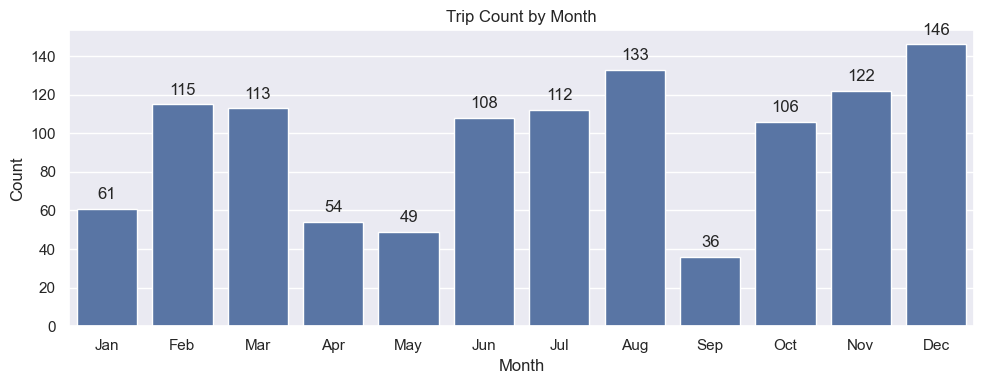

In [19]:
# TIME_OF_DAY Distribution
plt.figure(figsize=(8, 4))
time_order = df['TIME_OF_DAY'].value_counts().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])
ax1 = sns.countplot(data=df, x='TIME_OF_DAY', order=time_order.index)
plt.title('Trip Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')

for i, count in enumerate(time_order.values):
    ax1.text(i, count + 5, str(count), ha='center')

plt.tight_layout()
plt.show()

# DAY_OF_THE_RIDE Distribution
plt.figure(figsize=(8, 4))
day_order = df['DAY_OF_THE_RIDE'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax2 = sns.countplot(data=df, x='DAY_OF_THE_RIDE', order=day_order.index)
plt.title('Trip Count by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count')

for i, count in enumerate(day_order.values):
    ax2.text(i, count + 5, str(count), ha='center')

plt.tight_layout()
plt.show()

# MONTH_OF_THE_RIDE Distribution
plt.figure(figsize=(10, 4))
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts = df['MONTH_OF_THE_RIDE'].value_counts().reindex(month_order)
ax3 = sns.countplot(data=df, x='MONTH_OF_THE_RIDE', order=month_order)
plt.title('Trip Count by Month')
plt.xlabel('Month')
plt.ylabel('Count')

for i, count in enumerate(month_counts.values):
    ax3.text(i, count + 5, str(count), ha='center')

plt.tight_layout()
plt.show()

#Afternoon trips are the most frequent (541), followed by Evening and Morning.
#Fridays see the highest number of trips.
#December, August, and February are the peak months for ride activity.

In [20]:
mean_duration = df['DURATION_OF_THE_RIDE'].mean()
median_duration = df['DURATION_OF_THE_RIDE'].median()

print(f"Mean Duration: {mean_duration:.2f} minutes")
print(f"Median Duration: {median_duration:.2f} minutes")

Mean Duration: 23.24 minutes
Median Duration: 16.00 minutes


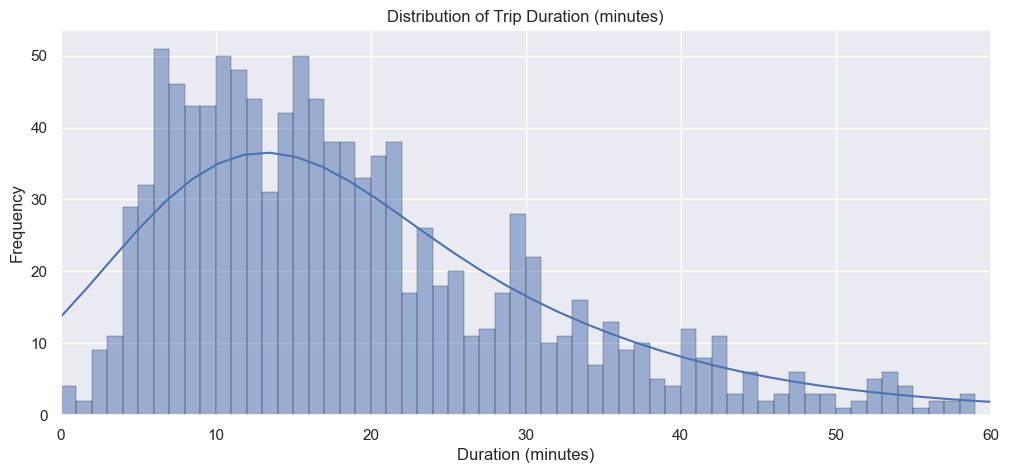

In [21]:
plt.figure(figsize=(12, 5))
sns.histplot(df['DURATION_OF_THE_RIDE'], binwidth=1, kde=True, edgecolor='black')
plt.title("Distribution of Trip Duration (minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 60)  # Show up to 60 minutes
plt.show()
#Majority of trips are short (under 30 minutes and under 10 miles).
#A few long trips (over 180 minutes or 50+ miles) are outliers.
#There is no clear linear relationship between distance and duration due to traffic variability, waiting time, etc.
#Trip durations vary by hour: early morning (~3 AM) has the highest average duration (likely long airport or intercity trips).

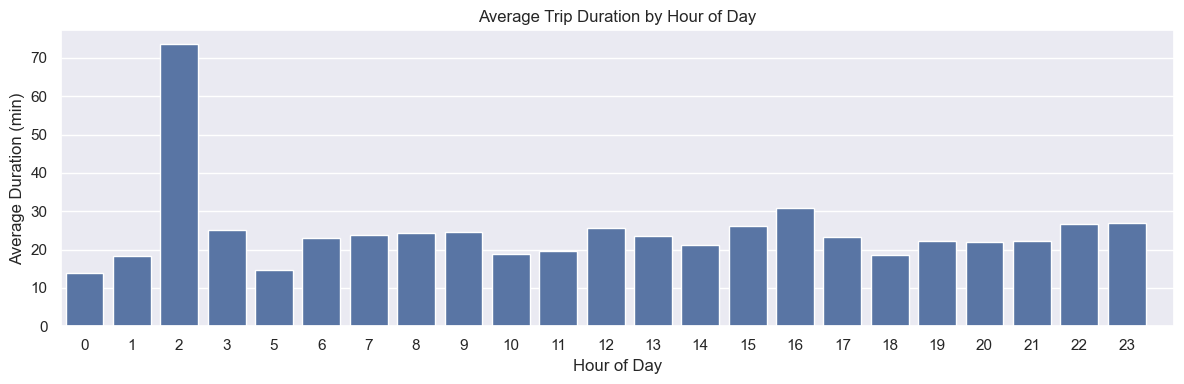

In [22]:
plt.figure(figsize=(12, 4))
sns.barplot(data=df, x='TIME_OF_DAY_HOUR', y='DURATION_OF_THE_RIDE', errorbar=None)
plt.title("Average Trip Duration by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Duration (min)")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [23]:
df[df['DURATION_OF_THE_RIDE'] > 120].sort_values('DURATION_OF_THE_RIDE', ascending=False).head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION_OF_THE_RIDE,TIME_OF_DAY_HOUR,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,NaN,336.0,21,Evening,Sep,Tue
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,330.0,16,Afternoon,Mar,Fri
546,2016-07-14 16:39:00,2016-07-14 20:05:00,Business,Morrisville,Banner Elk,195.3,NaN,206.0,16,Afternoon,Jul,Thu
559,2016-07-17 12:20:00,2016-07-17 15:25:00,Personal,Boone,Cary,180.2,Commute,185.0,12,Afternoon,Jul,Sun
881,2016-10-30 15:22:00,2016-10-30 18:23:00,Business,Asheville,Mebane,195.9,NaN,181.0,15,Afternoon,Oct,Sun


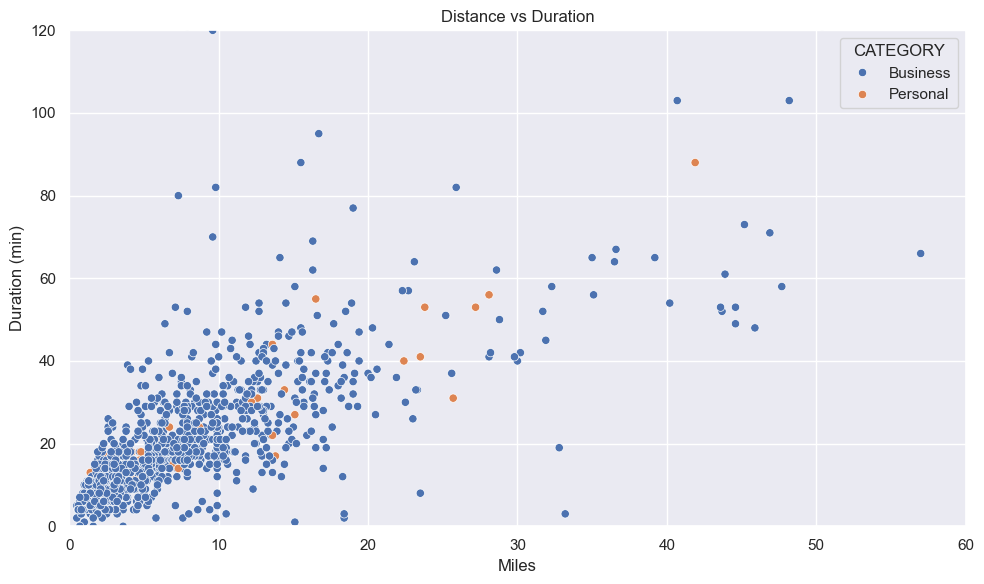

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MILES', y='DURATION_OF_THE_RIDE', hue='CATEGORY')
plt.title("Distance vs Duration")
plt.xlabel("Miles")
plt.ylabel("Duration (min)")
plt.xlim(0, 60)   # Limit x-axis to first 60 miles
plt.ylim(0, 120)  # Limit y-axis to first 120 minutes
plt.tight_layout()
plt.show()

In [25]:
#Insights:
#High concentration of trips in business hours (Afternoon, weekdays) suggests most usage is work-related.
#Meal and meeting trips make up a large portion, suggesting potential for corporate partnerships with restaurants and coworking spaces.
#The distribution of start/stop locations shows Cary and Morrisville are high-demand zones.
#The existence of Unknown Locations may indicate GPS/data entry issues or privacy settings.
#Trip durations and distances have a skewed distribution, suggesting room for more granular segmentation (e.g., micro vs macro trips).

#Recommendation per area:
#Area	             Recommendation
#Operations	         Add more drivers in Cary and Morrisville, especially on Fridays and afternoons.
#Product	         Offer business packages for frequent meeting/meal trips (e.g., loyalty points, subscription or bulk purchase).
#Data Quality	     Investigate and fix 'Unknown Location' entries, potentially using reverse geocoding or input validation.
#Marketing	         Target campaigns during Dec, Aug, and Feb to maximize ROI. Offer special promotions for weekends to balance demand.
#Pricing Strategy	 Consider dynamic pricing tweaks during peak hours (Afternoon/Evening on weekdays).
#Driver Scheduling	 Optimize shift planning based on hourly demand patterns, especially early morning long trips.


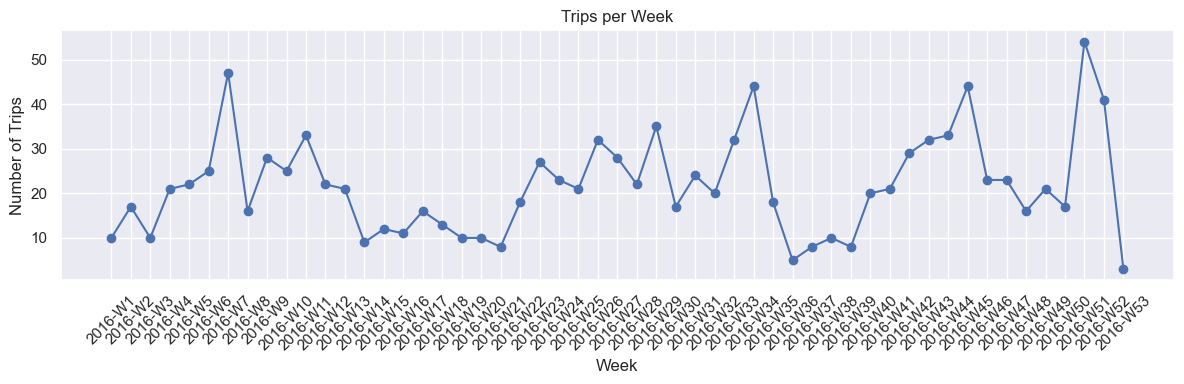

In [26]:
# Ensure START_DATE is in datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

# Create a new column for the week number (ISO week)
df['WEEK'] = df['START_DATE'].dt.isocalendar().week
df['YEAR'] = df['START_DATE'].dt.year

# Group by year and week to get ride counts
weekly_counts = df.groupby(['YEAR', 'WEEK']).size().reset_index(name='RIDE_COUNT')

# Create a label column for plotting
weekly_counts['WEEK_LABEL'] = weekly_counts['YEAR'].astype(str) + '-W' + weekly_counts['WEEK'].astype(str)

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(weekly_counts['WEEK_LABEL'], weekly_counts['RIDE_COUNT'], marker='o')
plt.xticks(rotation=45)
plt.title('Trips per Week')
plt.xlabel('Week')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.grid(True)
plt.show()

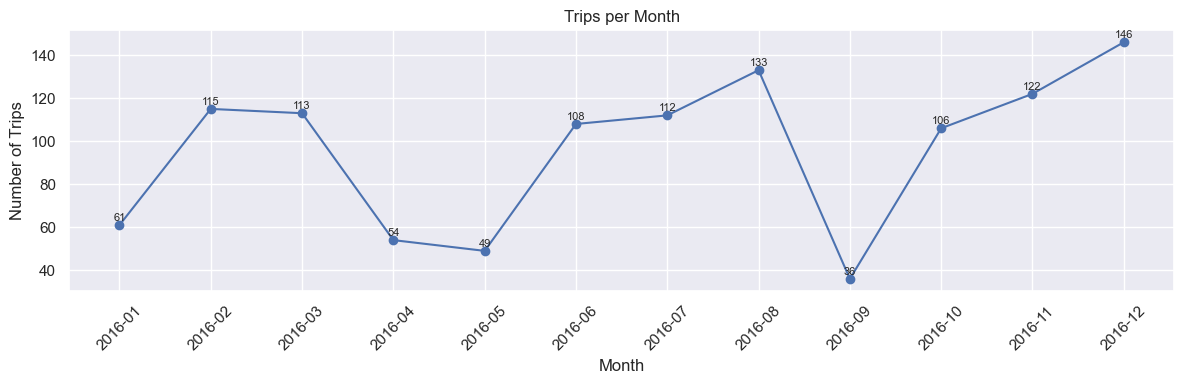

In [27]:
import matplotlib.pyplot as plt

# Ensure START_DATE is in datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

# Extract year and month
df['YEAR'] = df['START_DATE'].dt.year
df['MONTH'] = df['START_DATE'].dt.month

# Group by year and month
monthly_counts = df.groupby(['YEAR', 'MONTH']).size().reset_index(name='RIDE_COUNT')

# Create a label for x-axis (e.g. "2025-07")
monthly_counts['MONTH_LABEL'] = monthly_counts['YEAR'].astype(str) + '-' + monthly_counts['MONTH'].astype(str).str.zfill(2)

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(monthly_counts['MONTH_LABEL'], monthly_counts['RIDE_COUNT'], marker='o')
plt.xticks(rotation=45)
plt.title('Trips per Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.grid(True)

# Add value labels
for i, value in enumerate(monthly_counts['RIDE_COUNT']):
    plt.text(i, value + 2, str(value), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

#Strategic Planning
#Prepare for higher demand in November–December by scaling driver availability or offering promotions to meet demand.
#Analyze dip in September for root causes—could be a great opportunity for targeted marketing or engagement push.

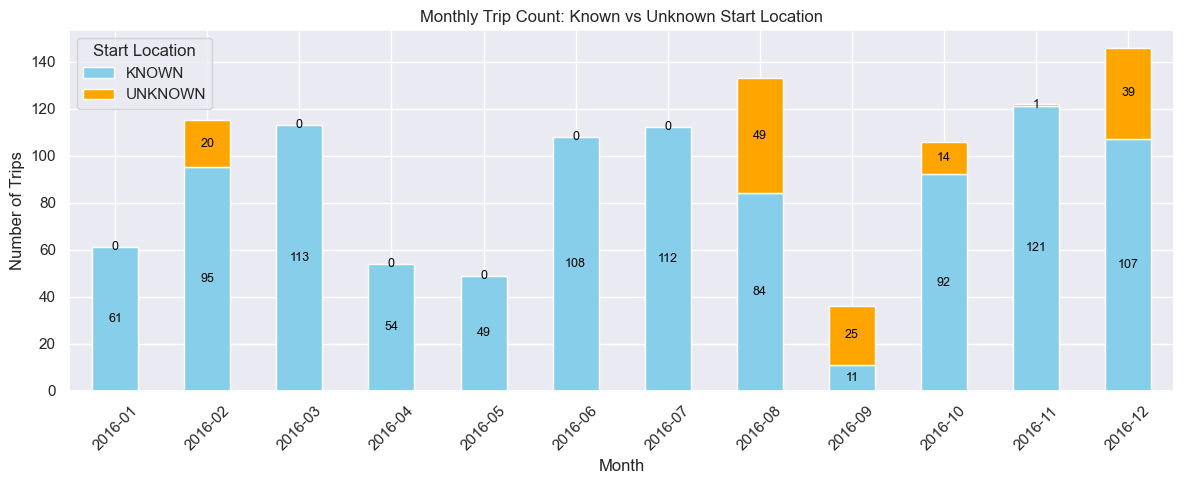

In [28]:
# Ensure START_DATE is datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

# Create month label
df['MONTH_LABEL'] = df['START_DATE'].dt.strftime('%Y-%m')

# Create flag for Unknown Location
df['IS_UNKNOWN_START'] = df['START'].str.strip().str.lower() == 'unknown location'

# Group data per month
monthly_data = df.groupby('MONTH_LABEL')['IS_UNKNOWN_START'].agg([
    ('UNKNOWN', 'sum'),
    ('TOTAL', 'count')
])
monthly_data['KNOWN'] = monthly_data['TOTAL'] - monthly_data['UNKNOWN']

# Plot stacked bar chart
ax = monthly_data[['KNOWN', 'UNKNOWN']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 5),
    color=['skyblue', 'orange']
)

plt.title('Monthly Trip Count: Known vs Unknown Start Location')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(title='Start Location')
plt.tight_layout()

# Annotate bar sections with counts
for i, (known, unknown) in enumerate(zip(monthly_data['KNOWN'], monthly_data['UNKNOWN'])):
    ax.text(i, known / 2, str(known), ha='center', va='center', fontsize=9, color='black')
    ax.text(i, known + unknown / 2, str(unknown), ha='center', va='center', fontsize=9, color='black')

plt.show()

#Operational Improvements
#Investigate the high percentage of “Unknown” start locations in specific months. This might be due to:
#GPS signal failure
#User permissions not granted
#Data syncing delays
#Implement stricter validation or fallback mechanisms (e.g., using network location or IP-based approximation).

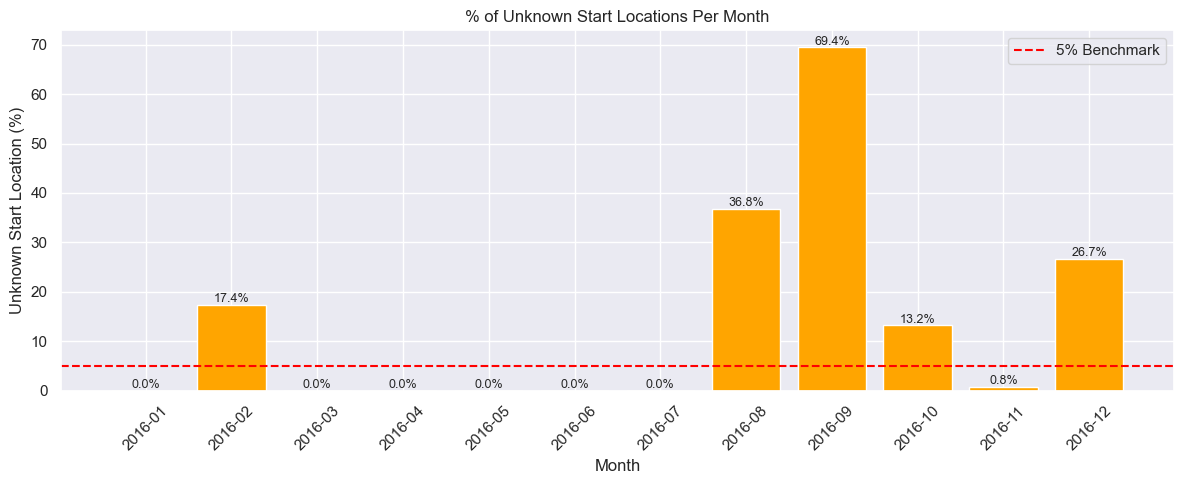

In [29]:
# Ensure START_DATE is datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

# Create Month Label
df['MONTH_LABEL'] = df['START_DATE'].dt.strftime('%Y-%m')

# Create flag for Unknown Location
df['IS_UNKNOWN_START'] = df['START'].str.strip().str.lower() == 'unknown location'

# Group by month and calculate % of Unknown
monthly_quality = df.groupby('MONTH_LABEL')['IS_UNKNOWN_START'].agg(['sum', 'count'])
monthly_quality['UNKNOWN_PERCENT'] = (monthly_quality['sum'] / monthly_quality['count']) * 100

# Plot
plt.figure(figsize=(12, 5))
plt.bar(monthly_quality.index, monthly_quality['UNKNOWN_PERCENT'], color='orange')
plt.axhline(y=5, color='red', linestyle='--', label='5% Benchmark')
plt.title('% of Unknown Start Locations Per Month')
plt.xlabel('Month')
plt.ylabel('Unknown Start Location (%)')
plt.xticks(rotation=45)
plt.legend()

# Annotate values
for i, value in enumerate(monthly_quality['UNKNOWN_PERCENT']):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()